<a href="https://colab.research.google.com/github/Haibei1115/Subglacial-Discharge/blob/main/Solving_in_R_Channel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

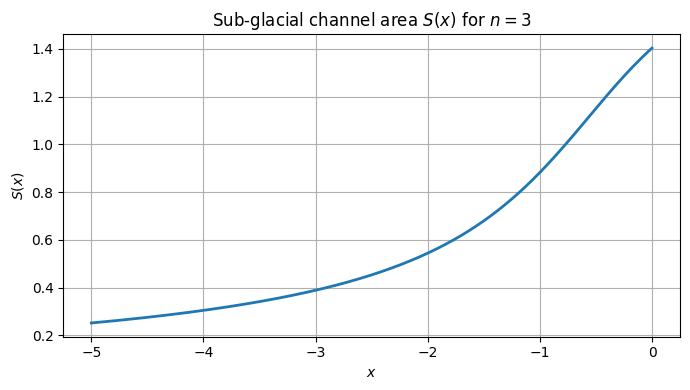

In [1]:
## Subglacial channel cross-sectional area S(x) from the Rothlisberger model
## In the channel model scaling for the inner layer

import numpy as np
import matplotlib.pyplot as plt
from scipy import special

# Analytic expression for S(x), valid only for x < 0
_a    = 0.25          # 1/4
_k    = 7.0 / 8.0     # 7/8
_coef = (7.0 / 8.0) * (8.0 / 7.0) ** 0.25   # (7/8)*(8/7)^{1/4}

def S(x):
    """
    Röthlisberger steady-state channel area for n = 3.

    Parameters
    ----------
    x : float or ndarray (must be negative)

    Returns
    -------
    ndarray or float
    """
    x = np.asarray(x)
    if np.any(x >= 0):
        raise ValueError("S(x) is defined only for x < 0.")
    z   = -x
    arg = _k * z**4
    # Γ(a, arg) = Γ(a) * Q(a, arg)   where Q is the regularized upper γ
    gamma_upper = special.gamma(_a) * special.gammaincc(_a, arg)
    return (_coef * np.exp(arg) * gamma_upper) ** (2.0 / 7.0)

# Plot S(x) on a convenient domain
x_vals = np.linspace(-5, -1e-3, 1200)   # avoid x = 0 exactly
S_vals = S(x_vals)

plt.figure(figsize=(7,4))
plt.plot(x_vals, S_vals, lw=2)
plt.xlabel(r'$x$')
plt.ylabel(r'$S(x)$')
plt.title(r'Sub-glacial channel area $S(x)$ for $n=3$')
plt.grid(True)
plt.tight_layout()
plt.show()



Key parameters for ĥ₂ᴸ(𝑥̃)
----------------------------------------
k       = 0.875
beta    = 0.904703
C2      = 1.85853e+18
Lambda  = 1.73984
K_math  = 27.6822
----------------------------------------


/tmp/ipython-input-3619155291.py:87: RuntimeWarning: overflow encountered in exp
  return K_math * (beta * np.exp(arg) * gamma_upper) ** (1.0 / 7.0)
/tmp/ipython-input-3619155291.py:87: RuntimeWarning: invalid value encountered in multiply
  return K_math * (beta * np.exp(arg) * gamma_upper) ** (1.0 / 7.0)


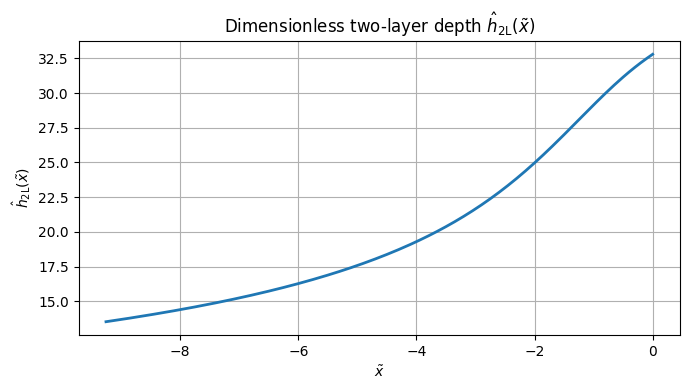

In [2]:
## Channel height h(x) in the two-layer flow scalings
## h(x) = sqrt(2S/pi)

"""
Two-layer depth h2L(𝑥̃) derived from the steady R-channel solution

This script

1.  defines the basic physical / scaling parameters,
2.  computes the intermediate constants
       k,  β,  C2,  Λ (Lambda),  K (mathcal K),
3.  prints them in a tidy table, and
4.  plots  ĥ₂ᴸ(𝑥̃)  for  𝑥̃∈[𝑥̃_min,0).

Everything uses SI units internally; the user may change the input
numbers at the top to explore other situations.
"""

import numpy as np
import matplotlib.pyplot as plt
from scipy import special

# 1. INPUT:  basic (dimensional) parameters
u_m_per_year   = 300.0           # m yr^{-1}
# u              = u_m_per_year / (365.25 * 24 * 3600)
# print(u)      # convert → m s^{-1}
u = 9.512e-10           # m/s (300 m/yr) (adjusted: low advection assumed for a valid HCP)
A_hat          = 1.78e-25        # Pa^{-3} s^{-1}
Psi_0          = 180.0           # Pa m^{-1}
rho_i          = 916.0           # kg m^{-3}
L              = 3.30e5          # J kg^{-1}   ( = 330 kJ kg^{-1})
K_c            = 0.1             # m^{3/2} kg^{-1/2}
Q              = 100.0           # m^{3} s^{-1}

H_inf          = 1            # m
c_d            = 0.01            # – (dimensionless)

# 2.  Derived coefficients for ĥ₂ᴸ(𝑥̃)
k      = 7.0 / 8.0
beta   = k * (8.0 / 7.0) ** 0.25
C2     = 1.0 / (A_hat * rho_i * L * K_c ** 2)

Lambda = (
    c_d / H_inf
    * (u / A_hat) ** 0.25
    * Psi_0 ** (-0.75)
)

K_math = (
    np.sqrt(2.0 / np.pi) / H_inf
    * (u / A_hat) ** (-3.0 / 28.0)
    * Psi_0 ** (-3.0 / 28.0)
    * C2 ** (1.0 / 7.0)
    * Q ** (3.0 / 7.0)
)

# 3.  Print the numbers
print("\nKey parameters for ĥ₂ᴸ(𝑥̃)")
print("-" * 40)
print(f"k       = {k:.6g}")
print(f"beta    = {beta:.6g}")
print(f"C2      = {C2:.6g}")
print(f"Lambda  = {Lambda:.6g}")
print(f"K_math  = {K_math:.6g}")
print("-" * 40)

# 4.  Define ĥ₂ᴸ(𝑥̃) as a Python function
def h2L_xtilde(xtilde):
    """
    Dimensionless two-layer depth ĥ₂ᴸ(𝑥̃).

    Parameters
    ----------
    xtilde : float or ndarray  (must be negative)

    Returns
    -------
    ĥ₂ᴸ(𝑥̃)  (same shape as xtilde)
    """
    xtilde = np.asarray(xtilde)
    if np.any(xtilde >= 0):
        raise ValueError("The formula is valid only for 𝑥̃ < 0.")
    z = -xtilde / Lambda
    arg = k * z ** 4
    # upper incomplete gamma Γ(1/4,arg) = Γ(1/4) * Q(1/4,arg)
    gamma_upper = special.gamma(0.25) * special.gammaincc(0.25, arg)
    return K_math * (beta * np.exp(arg) * gamma_upper) ** (1.0 / 7.0)

# 5.  Plot over a user-chosen 𝑥̃-range
xtilde_min = -100.0  # domain start (negative)
xtilde     = np.linspace(xtilde_min, -1e-3, 2000)
h_vals     = h2L_xtilde(xtilde)

plt.figure(figsize=(7, 4))
plt.plot(xtilde, h_vals, lw=2)
plt.xlabel(r'$\tilde{x}$')
plt.ylabel(r'$\hat{h}_{\mathrm{2L}}(\tilde{x})$')
plt.title('Dimensionless two-layer depth $\\hat{h}_{\\mathrm{2L}}(\\tilde{x})$')
plt.grid(True)
plt.tight_layout()
plt.show()


9.506426344208684e-06


/tmp/ipython-input-3884853027.py:36: RuntimeWarning: overflow encountered in exp
  h           = K * (C0 * np.exp(z) * Gamma_upper)**(2.0/7.0)
/tmp/ipython-input-3884853027.py:36: RuntimeWarning: invalid value encountered in multiply
  h           = K * (C0 * np.exp(z) * Gamma_upper)**(2.0/7.0)
/tmp/ipython-input-3884853027.py:42: RuntimeWarning: overflow encountered in exp
  return K * (C0 * np.exp(z) * G)**(2.0/7.0)
/tmp/ipython-input-3884853027.py:42: RuntimeWarning: invalid value encountered in multiply
  return K * (C0 * np.exp(z) * G)**(2.0/7.0)


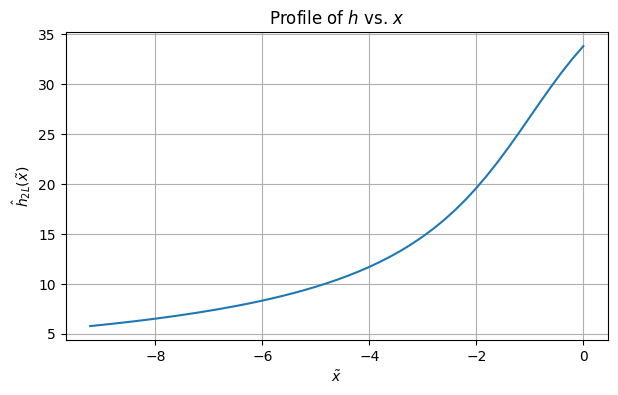

In [3]:
## Channel height h(x) in the two-layer flow scalings
## h(x) = S/W

import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma, gammaincc

# Parameters
u              = u_m_per_year / (365.25 * 24 * 3600)
print(u)
u = 9.512e-10           # m/s (300 m/yr) (adjusted: low advection assumed for a valid HCP)
A_hat  = 1.78e-25       # Pa⁻³ s⁻¹
Psi0   = 180.0          # Pa m⁻¹
rho_i  = 916.0          # kg m⁻³
L      = 3.30e5         # J kg⁻¹
Kc     = 0.1            # m^(3/2) kg^(–1/2)
Q      = 100.0          # m³ s⁻¹
H_inf  = 1              # m (adjusted)
c_d    = 0.01
W      = 50.0          # m (adjusted)

# Derived constants
k      = 7.0/8.0
C0     = k * (8.0/7.0)**0.25
Lambda = (c_d/H_inf) * (u/A_hat)**0.25 * Psi0**(-0.75)
C2     = 1.0/(A_hat * rho_i * L * Kc**2)
K      = (1.0/(W*H_inf)) * (u/A_hat)**(-3.0/14.0) * Psi0**(-3.0/14.0) \
         * C2**(2.0/7.0) * Q**(6.0/7.0)

# Define domain for \tilde{x}
xtilde = np.linspace(-100, 0, 500)  # adjust as needed

# Compute h(xtilde)
z           = k * (-xtilde/Lambda)**4
Gamma_upper = gamma(0.25) * gammaincc(0.25, z)  # upper incomplete gamma Γ(1/4, z)
h           = K * (C0 * np.exp(z) * Gamma_upper)**(2.0/7.0)

# Define the h(x) analytic function for later use
def h_func_analytic(x):
    z = k * (-x/Lambda)**4
    G = gamma(0.25) * gammaincc(0.25, z)
    return K * (C0 * np.exp(z) * G)**(2.0/7.0)

# Plot
plt.figure(figsize=(7,4))
plt.plot(xtilde, h_func_analytic(xtilde))
plt.xlabel(r'$\tilde x$')
plt.ylabel(r'$\hat h_{2L}(\tilde x)$')
plt.title('Profile of $h$ vs. $x$')
plt.grid(True)
plt.show()

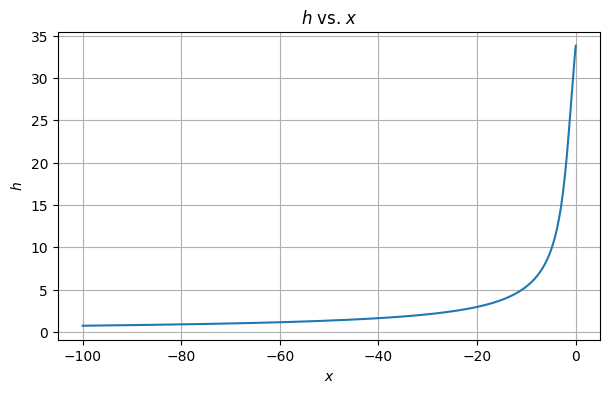

In [4]:
## Pre-processing h(x) such that there is no overflow issue
## At large values of z, take the asymptotic expansion

import numpy as np
from scipy.special import gammaincc, loggamma      # loggamma = ln Γ

k   = 7.0/8.0
C0  = k * (8.0/7.0)**0.25
a   = 0.25                       # shape parameter

def log_exp_gamma(a, z):
    """
    Return log( exp(z) * Γ(a,z) )  without overflow/underflow.

    Uses   log Γ(a,z)  for moderate z and an asymptotic expansion for large z.
    """
    z = np.asarray(z)
    out = np.empty_like(z, dtype=float)

    # region where gammaincc is still representable
    mask = z < 300.0                     # 300 is a safe, empirical cut-off
    if np.any(mask):
        out[mask] = (
            z[mask]                                # + log e^z
            + loggamma(a)                          # + log Γ(a)
            + np.log(gammaincc(a, z[mask]))        # + log Q(a,z)
        )

    # large-z asymptotic  Γ(a,z) ≈ z^{a-1} e^{-z} (1 + (a-1)/z + …)
    if np.any(~mask):
        zz = z[~mask]
        out[~mask] = (
            (a - 1.0) * np.log(zz)     # log z^{a-1}
            # first correction term  (cheap and improves accuracy)
            + np.log1p((a-1.0)/zz)
        )
        # the e^{-z} cancels exactly with the +z term above,
        # so do not add -zz here.

    return out

def h_func_analytic(x):
    z       = k * (-x / Lambda) ** 4
    log_arg = np.log(C0) + log_exp_gamma(a, z)   # ln( C0 * e^{z} Γ(a,z) )
    return K * np.exp((2.0/7.0) * log_arg)

# Plot approximated h(x)
x_vals = np.linspace(-100, 0, 500)

plt.figure(figsize=(7,4))
plt.plot(x_vals, h_func_analytic(x_vals))
plt.xlabel(r'$x$')
plt.ylabel(r'$h$')
plt.title('$h$ vs. $x$')
plt.grid(True)
plt.show()


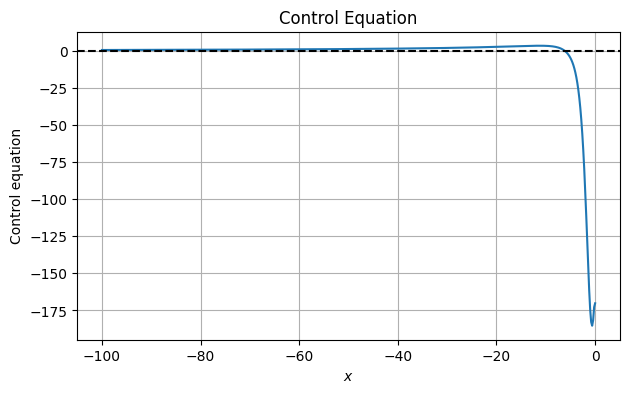

In [5]:
## Build the function to calculate x_c
## Plottting the control function to visualise the position of x_c

import numpy as np
from scipy.optimize import fsolve


def derivative(f, x, dx=1e-6):
    """
    Compute the derivative of f at x using a central finite difference.
    """
    return (f(x + dx) - f(x - dx)) / (2 * dx)

def find_control_point(h_func, C, F, S, x0, tol=1e-8):
    """
    Find x_c in [x_min, x_max] such that
        (1 + C * h/(h - F**(2/3))) - (S + dh/dx) = 0
    Returns
    -------
    x_c : float
        The hydraulic control point where the equation equals zero.
    """
    def control_eq(x):
        h = h_func(x)
        dhdx = derivative(h_func, x)
        # dhdx = np.gradient(h, x)
        return ((1 + C * h / (h - F**(2/3))) - (S + dhdx)) * (h - F**(2/3))

    # Find the root
    x_c = fsolve(control_eq, x0, xtol=tol)[0]
    return float(x_c)

# Plotting the control function
def h_exp(x):
    return 1 + np.exp(x)

def h_func_analytic(x):
    z       = k * (-x / Lambda) ** 4
    log_arg = np.log(C0) + log_exp_gamma(a, z)   # ln( C0 * e^{z} Γ(a,z) )
    return K * np.exp((2.0/7.0) * log_arg)

def control_eq(x):
        h = h_func(x)
        dhdx = np.gradient(h, x)
        # dhdx = derivative(h_func, x)
        return ((1 + C * h / (h - F**(2/3))) - (S + dhdx)) * (h - F**(2/3))
F = 0.25
S = 0.0
C = 0.1
# h_func = h_exp
h_func = h_func_analytic

x_vals = np.linspace(-100, 0, 500)
plt.figure(figsize=(7,4))
plt.plot(x_vals, control_eq(x_vals))
plt.axhline(y=0, color='k', linestyle='--')
plt.xlabel(r'$x$')
plt.ylabel('Control equation')
plt.title('Control Equation')
plt.grid(True)

In [6]:
## Interact with F
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from ipywidgets import interact, FloatSlider

def derivative(f, x, dx=1e-6):
    return (f(x + dx) - f(x - dx)) / (2 * dx)

def find_control_point(h_func, C, F, S, x0, tol=1e-8):
    def eq(x):
        h = h_func(x)
        dhdx = derivative(h_func, x)
        return ((1 + C*h/(h - F**(2/3))) - (S + dhdx))*(h - F**(2/3))
    return float(fsolve(eq, x0, xtol=tol)[0])

def h_exp(x):
    return 1 + np.exp(x)

# choose which h_func
# h_func = h_exp
h_func = h_func_analytic

# — fixed parameters —
C  = 0.1
S  = 0.0

# pre‐compute the x‐grid
x_vals = np.linspace(-50, 0, 500)

def plot_control(F):
    # compute control‐equation on the grid
    h_vals  = h_func(x_vals)
    dhdx    = np.gradient(h_vals, x_vals)
    ctrl    = ((1 + C*h_vals/(h_vals - F**(2/3))) - (S + dhdx))*(h_vals - F**(2/3))

    # plot
    plt.figure(figsize=(7,4))
    plt.plot(x_vals, ctrl, label='control eq.')
    plt.axhline(0, color='k', linestyle='--')
    plt.xlabel('x')
    plt.ylabel('Control eq.')
    plt.title(f'Control curve at F = {F:.2f}')
    plt.legend()
    plt.grid(True)
    plt.show()

# introduce the slider
interact(
    plot_control,
    F=FloatSlider(min=0.01, max=50.0, step=0.1, value=0.25, description='F')
);


# calculate x_c value
x0 = -2.0
@interact(F=FloatSlider(
    value=0.25, min=0.01, max=50, step=0.1, description='F'
))
def show_xc(F):
    try:
        x_c = find_control_point(h_func, C, F, S, x0)
        print(f"x_c = {x_c:.6f}")
    except Exception as e:
        print("failed to find root:", e)

interactive(children=(FloatSlider(value=0.25, description='F', max=50.0, min=0.01), Output()), _dom_classes=('…

interactive(children=(FloatSlider(value=0.25, description='F', max=50.0, min=0.01), Output()), _dom_classes=('…

Control point x_c = 0.11599531761234443


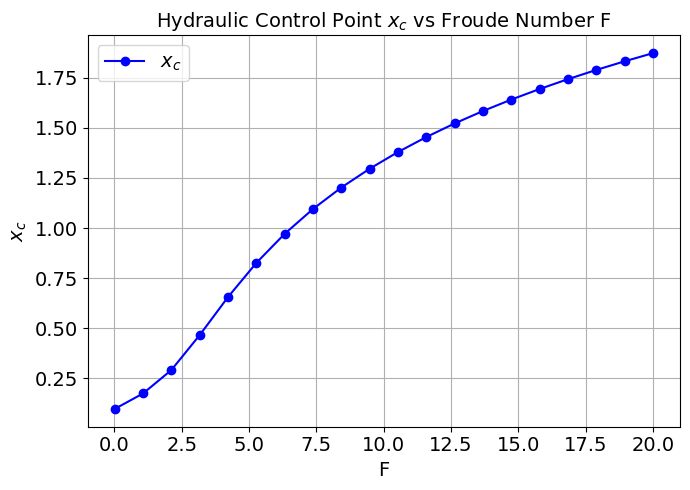

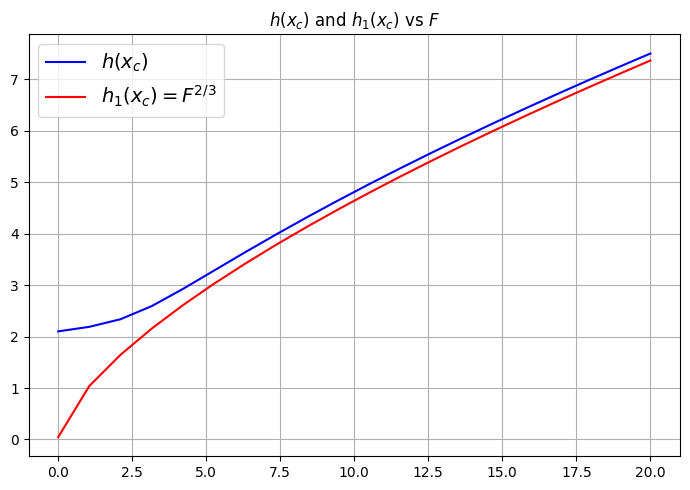

In [7]:
## Example use of the find_control_point function on h(x) = 1+e^x
def h_exp(x):
    return 1 + np.exp(x)

x_c = find_control_point(
    h_func = h_exp,
    C=0.1,      # example C
    F=0.25,       # example F
    S=0.0,      # example S
    x0 = 0.1      # initial guess
)
print("Control point x_c =", x_c)

# Sweep over F to see how x_c varies with F
F_values = np.linspace(0.01, 20, 20)
x_c_vals = []
# Fix S and C as we vary F:
S_fixed = 0.0
C_fixed = 0.1

for F in F_values:
    x_c = find_control_point(h_exp, C_fixed, F, S_fixed, x0 = 2)
    x_c_vals.append(x_c)

# 2) Plot x_c^+ and x_c^- as functions of F
plt.figure(figsize=(7, 5))
plt.plot(F_values, x_c_vals, 'bo-', label=r"$x_c$")


# Axis labels and title with fontsize=14
plt.xlabel("F", fontsize=14)
plt.ylabel(r"$x_c$", fontsize=14)
plt.title(r"Hydraulic Control Point $x_c$ vs Froude Number F", fontsize=14)

# Make sure all tick labels use fontsize=14
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# Legend with fontsize=14
plt.legend(fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

# To determine whether there will be intrusion or not
x_c_arr = np.asarray(x_c_vals)
h_c_vals = h_exp(x_c_arr)
plt.figure(figsize=(7, 5))
plt.plot(F_values, h_c_vals, 'b-', label = r"$h(x_c)$")
plt.plot(F_values, F_values**(2/3), 'r-', label = r"$h_1(x_c) = F^{2/3}$")
plt.title(r"$h(x_c)$ and $h_1(x_c)$ vs $F$")
plt.legend(fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

Control point x_c = -6.216129187327324


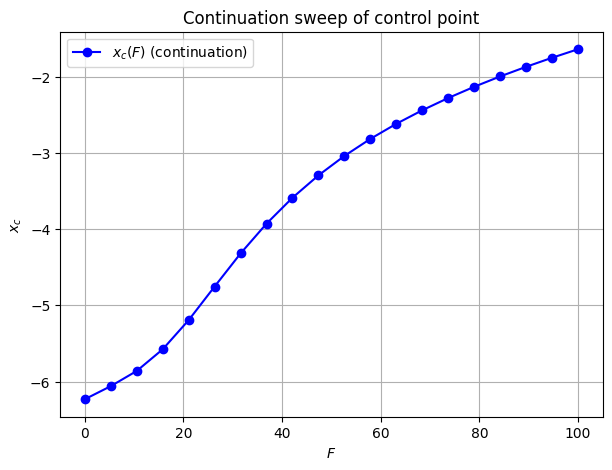

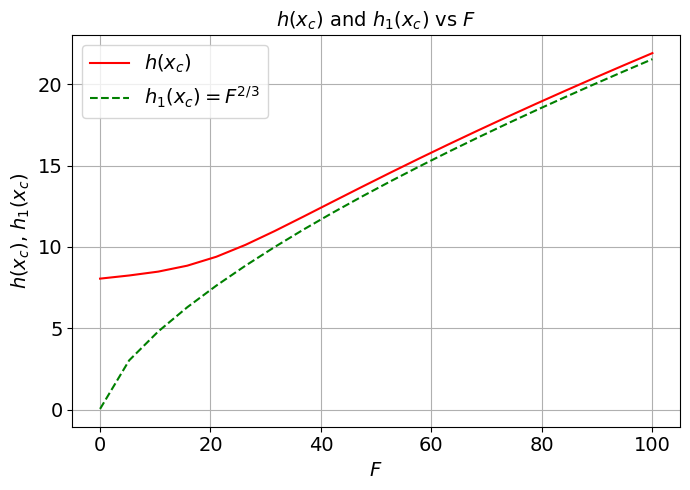

In [8]:
## Example use of the find_control_point function on h(x) = S(x)/W
## Implemented continuation method

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

def h_func_analytic(x):
    z       = k * (-x / Lambda) ** 4
    log_arg = np.log(C0) + log_exp_gamma(a, z)   # ln( C0 * e^{z} Γ(a,z) )
    return K * np.exp((2.0/7.0) * log_arg)

x_c = find_control_point(
    h_func=h_func_analytic,
    C=0.1,      # example C
    F=0.25,       # example F
    S=0.0,      # example S
    x0 = -7      # initial guess
)
print("Control point x_c =", x_c)

# Fixed parameters
C_fixed = 0.1
S_fixed = 0.0

# The F-values to sweep through
F_values = np.linspace(0.01, 100, 20)

# Prepare storage
x_c_vals = []

# Set the starting guess for the very first solve
x0 = -7.0

# Continuation loop:
for F in F_values:
    # solve for the new x_c using the *previous* x_c as the guess
    x_c = find_control_point(
        h_func=h_func_analytic,
        C=C_fixed,
        F=F,
        S=S_fixed,
        x0=x0,          # <-- continuation: use last x_c
        tol=1e-6
    )
    x_c_vals.append(x_c)
    # update the guess for the *next* iterate
    x0 = x_c

# Plot
plt.figure(figsize=(7, 5))
plt.plot(F_values, x_c_vals, 'bo-', label=r"$x_c(F)$ (continuation)")
plt.xlabel(r"$F$")
plt.ylabel(r"$x_c$")
plt.title("Continuation sweep of control point")
plt.legend()
plt.grid(True)
plt.show()

# To determine whether there will be intrusion or not
x_c_arr = np.asarray(x_c_vals)
h_c_vals = h_func_analytic(x_c_arr)
plt.figure(figsize=(7, 5))
plt.plot(F_values, h_c_vals, 'r-', label = r"$h(x_c)$")
plt.plot(F_values, F_values**(2/3), 'g--', label = r"$h_1(x_c) = F^{2/3}$")
plt.title(r"$h(x_c)$ and $h_1(x_c)$ vs $F$", fontsize = 14)
plt.tick_params(axis='both', labelsize=14)
plt.xlabel(r"$F$", fontsize = 14)
plt.ylabel(r"$h(x_c)$, $h_1(x_c)$", fontsize = 14)
plt.legend(fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()


In [9]:
## Build the function to calculate perturbation in B.C.

import math
from typing import Tuple, Literal

def k_initial(
    F: float,
    C: float,
    h_c: float,
    h_c_prime: float,
    h_c_double_prime: float,
    root: Literal["plus", "minus"] = "plus",
) -> float:
    """
    Compute the inner‐layer initial slope k that satisfies

        (3/F^{2/3}) k^2 − A1 k + Ax = 0,

    with
        Δ        = h_c − F^{2/3}
        Ax       = C*(−F^{2/3} * h_c_prime) / Δ**2  − h_c_double_prime
        A1       = C*h_c/Δ**2 − (3/F^{2/3})*(1 + C*h_c/Δ)

        k = (F^{2/3}/6) * [ A1 ± sqrt( A1**2 − (12/F^{2/3})*Ax ) ].

    Parameters
    ----------
    F  : Froude number (positive).
    C  : density-ratio parameter.
    h_c, h_c_prime, h_c_double_prime : depth, first and second x-derivatives
         of the prescribed total depth h(x) evaluated at the control point x_c.
    root : choose `"plus"` (default) or `"minus"` branch of the quadratic.

    Returns
    -------
    k : float
        The requested root.  Raises ValueError if the discriminant is negative
        (no real solution) or if Δ = 0.

    Examples
    --------
    >>> k_initial(F=1.5, C=0.2, h_c=3.0,
    ...           h_c_prime=0.10, h_c_double_prime=-0.05)
    -0.0142748762781836
    >>> k_initial(..., root="minus")
    ...
    """
    # Δ = h_c − F^{2/3}
    delta = h_c - F ** (2 / 3)
    if delta == 0.0:
        raise ValueError("Δ = 0 ⇒ control point is ill-defined.")

    # Ax and A1
    Ax = C * (-F ** (2 / 3) * h_c_prime) / delta ** 2 - h_c_double_prime
    A1 = C * h_c / delta ** 2 - (3 / F ** (2 / 3)) * (1 + C * h_c / delta)

    # Discriminant
    disc = A1 ** 2 - (12 / F ** (2 / 3)) * Ax
    if disc < 0:
        raise ValueError("Discriminant < 0 ⇒ k is complex.")

    sqrt_disc = math.sqrt(disc)
    factor = F ** (2 / 3) / 6
    k = factor * (A1 + sqrt_disc if root == "plus" else A1 - sqrt_disc)
    return float(k)

In [10]:
## Example Calculation of Perturbation in B.C. for h(x) = 1+e^x

def channel_height(x):
    """
    Prescribed channel shape h(x) = 1 + e^x.
    Valid for x in (-∞, 0].
    """
    return 1.0 + np.exp(x)

# def dhdx(x):
    # return np.exp(x)

# def d2hdx2(x):
    # return np.exp(x)

F               = 0.25          # Froude number
S               = 0.0           # slope parameter
C               = 0.1

x_c = find_control_point(
    channel_height,
    C,      # example C
    F,       # example F
    S,      # example S
    x0 = 2      # initial guess
)
print("Control point x_c =", x_c)

def dhdx(x):
    dhdx = derivative(channel_height, x, dx = 1e-6)
    return dhdx

def d2hdx2(x):
    d2hdx2 = derivative(dhdx, x, dx = 1e-6)
    return d2hdx2

h_c = channel_height(x_c)          # h(x_c)
dhdx_c = dhdx(x_c) # dh/dx at x_c
d2hdx2_c = d2hdx2(x_c)  # d²h/dx² at x_c

k_plus  = k_initial(F, C, h_c, dhdx_c, d2hdx2_c, "plus")
k_minus = k_initial(F, C, h_c, dhdx_c, d2hdx2_c, "minus")

print("k (plus branch)  =", k_plus)
print("k (minus branch) =", k_minus)

Control point x_c = 0.11599531749654636
k (plus branch)  = 0.12185808559147503
k (minus branch) = -1.235423267087486


k (plus branch)  = 0.03667262154476887
k (minus branch) = -1.1400312389174265


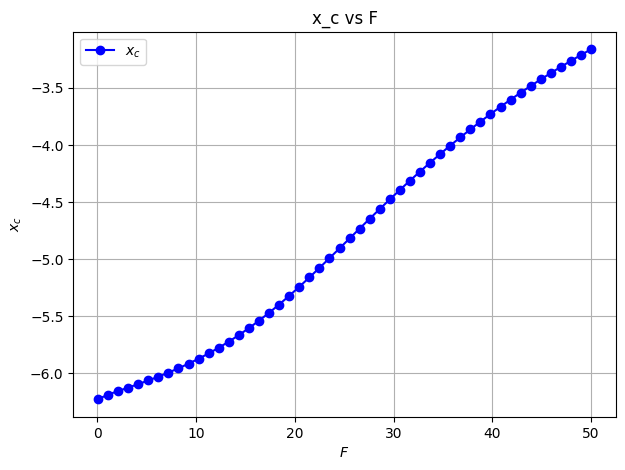

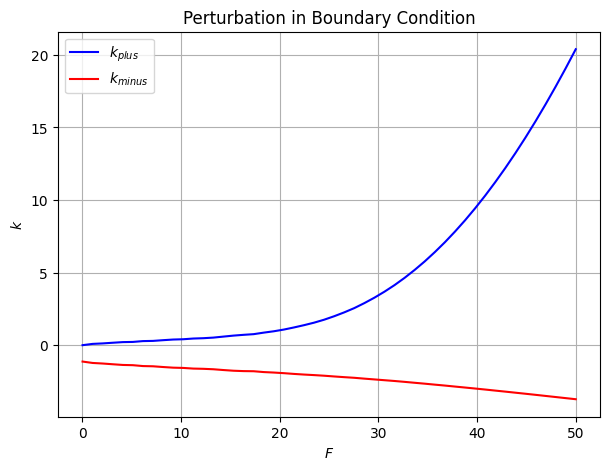

In [11]:
## Example calculation of perturbation in B.C. for h(x) = S(x)/W

def h_func_analytic(x):
    z       = k * (-x / Lambda) ** 4
    log_arg = np.log(C0) + log_exp_gamma(a, z)   # ln( C0 * e^{z} Γ(a,z) )
    return K * np.exp((2.0/7.0) * log_arg)

x_c = find_control_point(
    h_func_analytic,
    C = 0.1,      # example C
    F = 0.25,       # example F
    S = 0.0,      # example S
    x0 = -8      # initial guess
)

def dhdx(x):
    dhdx = derivative(h_func_analytic, x)
    return dhdx

def d2hdx2(x):
    d2hdx2 = derivative(dhdx, x)
    return d2hdx2

h_c = h_func_analytic(x_c)          # h(x_c)
dhdx_c = dhdx(x_c)                  # dh/dx at x_c
d2hdx2_c = d2hdx2(x_c)              # d²h/dx² at x_c

k_plus  = k_initial(F, C, h_c, dhdx_c, d2hdx2_c, "plus")
k_minus = k_initial(F, C, h_c, dhdx_c, d2hdx2_c, "minus")

print("k (plus branch)  =", k_plus)
print("k (minus branch) =", k_minus)


## Plotting k values against F (continuation method for finding x_c)
F_values = np.linspace(0.05, 50, 50)
x_c_vals = []
k_plus_vals = []
k_minus_vals = []
# Fix S and C as we vary F:
S_fixed = 0.0
C_fixed = 0.1
x0 = -8

for F in F_values:
    x_c = find_control_point(
        h_func_analytic,
        C = C_fixed,      # example C
        F = F,       # example F
        S = S_fixed,      # example S
        x0 = x0      # initial guess
    )
    x_c_vals.append(x_c)
    h_c = h_func_analytic(x_c)
    dhdx_c = dhdx(x_c) # dh/dx at x_c
    d2hdx2_c = d2hdx2(x_c)  # d²h/dx² at x_c
    k_plus  = k_initial(F, C, h_c, dhdx_c, d2hdx2_c, "plus")
    k_minus = k_initial(F, C, h_c, dhdx_c, d2hdx2_c, "minus")
    k_plus_vals.append(k_plus)
    k_minus_vals.append(k_minus)
    x0 = x_c

# Plot x_c against F
plt.figure(figsize=(7, 5))
plt.plot(F_values, x_c_vals, 'bo-', label=r"$x_c$")
plt.xlabel(r"$F$")
plt.ylabel(r"$x_c$")
plt.title("x_c vs F")
plt.legend()
plt.grid(True)
plt.show()

# Plot k against F
plt.figure(figsize=(7, 5))
plt.plot(F_values, k_plus_vals, 'b-', label=r"$k_{plus}$")
plt.plot(F_values, k_minus_vals, 'r-', label=r"$k_{minus}$")
plt.xlabel(r"$F$")
plt.ylabel(r"$k$")
plt.title("Perturbation in Boundary Condition")
plt.legend()
plt.grid(True)
plt.show()

Solution found up to x = -47.90040229865947 => l = 41.6842731326306


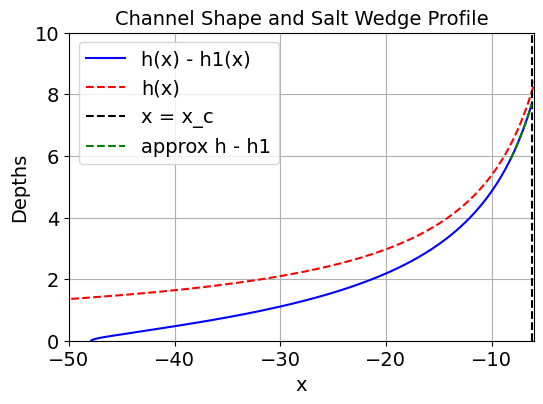

/tmp/ipython-input-1189008062.py:15: RuntimeWarning: The iteration is not making good progress, as measured by the 
 improvement from the last ten iterations.
  return float(fsolve(eq, x0, xtol=tol)[0])


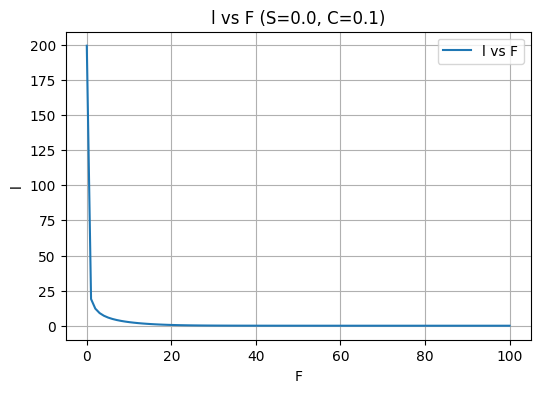

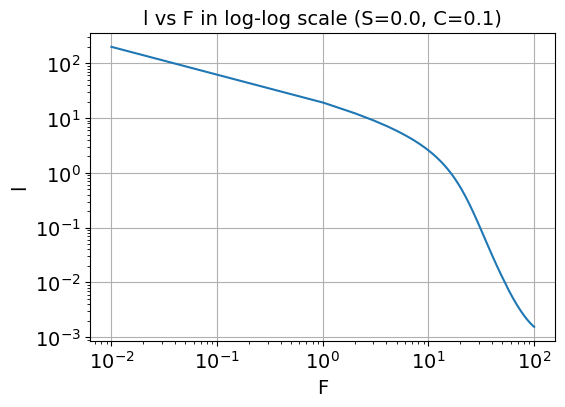

In [12]:
## h1 ODE integration with perturbed B.C.: epsilon = 10^(-6)
## l against F

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def h_func_analytic(x):
    z       = k * (-x / Lambda) ** 4
    log_arg = np.log(C0) + log_exp_gamma(a, z)   # ln( C0 * e^{z} Γ(a,z) )
    return K * np.exp((2.0/7.0) * log_arg)

def dhdx(x):
    dhdx = derivative(h_func_analytic, x)
    return dhdx

def d2hdx2(x):
        d2hdx2 = derivative(dhdx, x)
        return d2hdx2

def ode_system(x, h1, F, S, C):
    h = h_func_analytic(x)
    dhdx_val = dhdx(x)

    numerator = (F**2 / h1**3) * (1 + C * h / (h - h1)) - (S + dhdx_val)
    denominator = (F**2 / h1**3) - 1.0
    return numerator / denominator

def event_h1_equals_h(x, y, F, S, C):
    h = h_func_analytic(x)
    return y[0] - (h - 1e-6)
evt = lambda x, y: event_h1_equals_h(x, y, F, S, C)
evt.terminal  = True
evt.direction = 0

def solve_h1(F, S, C, x0,
             x_end=-1000):
    # The exact boundary condition is h1(0) = F^(2/3).
    # To avoid singularity, we start from x_start < 0 with h1 ~ F^(2/3).
    x_c = find_control_point(
    h_func_analytic,
    C,      # example C
    F,      # example F
    S,      # example S
    x0      # initial guess
    )

    h_c = h_func_analytic(x_c)          # h(x_c)
    dhdx_c = dhdx(x_c) # dh/dx at x_c
    d2hdx2_c = d2hdx2(x_c)  # d²h/dx² at x_c
    k_plus  = k_initial(F, C, h_c, dhdx_c, d2hdx2_c, "plus")

    h1_boundary = F**(2.0/3.0) + 1e-6 * k_plus
    y0 = [h1_boundary]
    x_start = x_c - 1e-6

    # We'll integrate from x_start to x_end. Because x_start > x_end,
    # the solver automatically goes "backwards" in x.
    def rhs(x, y, F, S, C):
            # compute the scalar derivative
            dh1dx = ode_system(x, y[0], F, S, C)
            # return it as a 1‐element list/array
            return [dh1dx]

    sol = solve_ivp(
        fun=lambda xx, yy: rhs(xx, yy, F, S, C),
        t_span=(x_start, x_end),
        y0=y0,
        method='Radau',           # <-- stiff solver
        max_step=1e-2,            # control step size near singularity
        rtol=1e-6, atol=1e-8,
        events=evt,
        dense_output=True,  # so we can evaluate anywhere
        # max_step=1e-3       # limit step size if needed
    )

    # Check if the event was triggered:
    if sol.t_events[0].size > 0:
        x_stop  = sol.t_events[0][0]           # precise location
        h1_stop = sol.y_events[0][0, 0]        # h1 there (already stored)
    else:
        # No event triggered => h1 might never equal h within x_start..x_end
        x_stop = None # unbounded intrusion if h1 never reaches h
        h1_stop = None

    return sol, x_stop, h1_stop

def example_single_solution_plot():
    x0 = -8.0
    F = 0.25
    S = 0.0
    C = 0.1

    sol, x_stop, h1_stop = solve_h1(F, S, C, x0)
    x_c = find_control_point(
    h_func_analytic,
    C,      # example C
    F,       # example F
    S,      # example S
    x0      # initial guess
    )

    if x_stop is not None:
        l_val = x_c - x_stop
        print(f"Solution found up to x = {x_stop} => l = {l_val}")
    else:
        print("No crossing event found where h1 = h in the interval.")

    # Plot h1 vs x along the solution
    plt.figure(figsize=(6,4))
    x_start = x_c - 1e-6
    x_vals = np.linspace(x_start, x_stop, 200)
    h1_plot = sol.sol(x_vals)[0]
    # plt.plot(x_vals, h1_plot, 'b-', label='h1(x)')
    plt.plot(x_vals, h_func_analytic(x_vals) - h1_plot, 'b-', label='h(x) - h1(x)')

    # Also plot the channel shape h(x) for reference
    x_vals1 = np.linspace(0, - 50, 200)
    plt.plot(x_vals1, h_func_analytic(x_vals1), 'r--', label='h(x)')
    plt.axvline(x=x_c, color='k', linestyle='--', label='x = x_c')

    # Plot the approx h - h1 to check if k is sensible
    def approxh_h1(x):
        h_c = h_func_analytic(x_c)          # h(x_c)
        dhdx_c = dhdx(x_c)                  # dh/dx at x_c
        d2hdx2_c = d2hdx2(x_c)              # d²h/dx² at x_c
        k_plus  = k_initial(F, C, h_c, dhdx_c, d2hdx2_c, "plus")
        return h_func_analytic(x) - F**(2/3) - k_plus * (x_c - x)

    x_vals2 = np.linspace(x_start - 2, x_start, 50)
    plt.plot(x_vals2, approxh_h1(x_vals2) , 'g--', label='approx h - h1')

    # Plotting format
    plt.xlim(left = -50, right = -6)
    plt.ylim(bottom= 0, top = 10)
    plt.tick_params(axis='both', which='major', labelsize=14)
    plt.xlabel('x', fontsize =14)
    plt.ylabel('Depths', fontsize =14)
    plt.title(f'Channel Shape and Salt Wedge Profile', fontsize =14)
    plt.legend(fontsize =14)
    plt.grid(True)
    plt.show()

def sweep_F_values():
    """
    Example of sweeping over a range of F values and finding the corresponding l.
    Plots l against F.
    """
    F_values = np.linspace(0.01, 100, 100)
    S = 0.0
    C = 0.1
    x0 = -8.0

    L_values = []
    for F in F_values:
        x_c = find_control_point(
        h_func_analytic,
        C,      # example C
        F,       # example F
        S,      # example S
        x0     # initial guess
        )
        sol, x_stop, h1_stop = solve_h1(F, S, C, x0)
        if x_stop is not None:
            L_values.append(x_c - x_stop)
        else:
            # If no crossing found, store NaN or some sentinel
            L_values.append(np.nan)
        x0 = x_c

    plt.figure(figsize=(6,4))
    plt.plot(F_values, L_values, '-', label='l vs F')
    plt.xlabel('F')
    plt.ylabel('l')
    plt.title(f'l vs F (S={S}, C={C})')
    plt.grid(True)
    plt.legend()
    plt.show()

    plt.figure(figsize=(6,4))
    plt.loglog(F_values, L_values, '-', label='ℓ vs F')
    plt.xlabel('F', fontsize = 14)
    plt.ylabel('l', fontsize = 14)
    plt.title(f'l vs F in log-log scale (S={S}, C={C})', fontsize = 14)
    plt.tick_params(axis='both', which='major', labelsize=14)
    plt.grid(True)
    # plt.legend(fontsize = 14)
    plt.show()

if __name__ == "__main__":
    # 1) Solve once for a single set of parameters and plot h1(x) vs x
    example_single_solution_plot()

    # 2) Sweep over F and plot l(F)
    sweep_F_values()

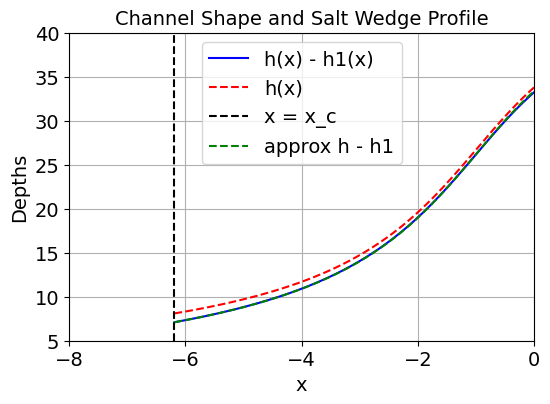

In [13]:
## h1 ODE integration with perturbed B.C.: epsilon = 10^(-6)
## fresh water plume

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def ode_system(x, h1, F, S, C):
    h = h_func_analytic(x)
    dhdx_val = dhdx(x)

    numerator = (F**2 / h1**3) * (1 + C * h / (h - h1)) - (S + dhdx_val)
    denominator = (F**2 / h1**3) - 1.0

    # Avoid dividing by zero in practice, so handle carefully if the solution is near the singularity.
    return numerator / denominator

def event_h1_equals_h(x, y, F, S, C):
    """
    Event function for solve_ivp to stop when h1(x) == h(x).
    We define the zero-crossing to be h1 - h = 0.
    """
    h = h_func_analytic(x)
    return y[0] - h
evt = lambda x, y: event_h1_equals_h(x, y, F, S, C)
evt.terminal  = True
evt.direction = 0


def solve_h1(F, S, C,
             x_end = 0):

    # The exact boundary condition is h1(0) = F^(2/3).
    # To avoid singularity, we start from x_start < 0 with h1 ~ F^(2/3).
    x_c = find_control_point(
    h_func_analytic,
    C,      # example C
    F,       # example F
    S,      # example S
    x0 = -8      # initial guess
    )

    h_c = h_func_analytic(x_c)          # h(x_c)
    dhdx_c = dhdx(x_c) # dh/dx at x_c
    d2hdx2_c = d2hdx2(x_c)  # d²h/dx² at x_c
    k_plus  = k_initial(F, C, h_c, dhdx_c, d2hdx2_c, "plus")

    h1_boundary = F**(2.0/3.0) - 1e-6 * k_plus
    y0 = [h1_boundary]
    x_start = x_c + 1e-6

    # We'll integrate from x_start to x_end. Because x_start > x_end,
    # the solver automatically goes "backwards" in x.
    def rhs(x, y, F, S, C):
            # compute the scalar derivative
            dh1dx = ode_system(x, y[0], F, S, C)
            # return it as a 1‐element list/array
            return [dh1dx]

    sol = solve_ivp(
        fun=lambda xx, yy: rhs(xx, yy, F, S, C),
        t_span=(x_start, x_end),
        y0=y0,
        method='Radau',           # <-- stiff solver
        max_step=1e-2,            # control step size near singularity
        rtol=1e-6, atol=1e-8,
        # events=evt,
        dense_output=True,  # so we can evaluate anywhere
    )

    return sol

def example_single_solution_plot():
    """
    Example of solving and plotting h1(x) vs x for a single set of parameters.
    """
    F = 1
    S = 0.0
    C = 0.1

    sol = solve_h1(F, S, C)
    x_c = find_control_point(
    h_func_analytic,
    C,      # example C
    F,       # example F
    S,      # example S
    x0 = -8      # initial guess
    )

    # Plot h1 vs x along the solution
    plt.figure(figsize=(6,4))
    x_start = x_c + 1e-6
    x_vals = np.linspace(x_start, 0, 200)
    h1_plot = sol.sol(x_vals)[0]
    # plt.plot(x_vals, h1_plot, 'b-', label='h1(x)')
    plt.plot(x_vals, h_func_analytic(x_vals) - h1_plot, 'b-', label='h(x) - h1(x)')

    # Also plot the channel shape h(x) for reference
    plt.plot(x_vals, h_func_analytic(x_vals), 'r--', label='h(x)')
    plt.axvline(x=x_c, color='k', linestyle='--', label='x = x_c')

    def approxh_h1(x):
        dhdx_c = derivative(h_func_analytic, x_c) # dh/dx at x_c
        d2hdx2_c = derivative(dhdx, x_c)  # d²h/dx² at x_c
        h_c = h_func_analytic(x_c)          # h(x_c)
        k_plus  = k_initial(F, C, h_c, dhdx_c, d2hdx2_c, "plus")
        return h_func_analytic(x) - F**(2/3) - k_plus * (x_c - x)

    x_vals1 = np.linspace(x_start, 0, 50)
    plt.plot(x_vals1, approxh_h1(x_vals1) , 'g--', label='approx h - h1')

    # Plotting format
    plt.xlim(left = -8, right = 0)
    plt.ylim(bottom=5, top = 40)
    plt.tick_params(axis='both', which='major', labelsize=14)
    plt.xlabel('x', fontsize =14)
    plt.ylabel('Depths', fontsize =14)
    plt.title(f'Channel Shape and Salt Wedge Profile', fontsize =14)
    plt.legend(fontsize =14)
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    # 1) Solve once for a single set of parameters and plot h1(x) vs x
    example_single_solution_plot()